In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
report_fp = Path.cwd() / "alexnetsplit__2023-10-22T165331.pkl"
report_fp.exists() and report_fp.is_file()

True

In [3]:
with open(report_fp, "rb") as file:
    report_dict = pickle.load(file)
report_dict

{'9a659c2c-dfd1-44e1-af99-5fff13843aba': {'inference_id': '9a659c2c-dfd1-44e1-af99-5fff13843aba.0',
  'layer_information': {19: {'layer_id': 19,
    'completed_by_node': 'CLIENT1',
    'class': 'ReLU',
    'inference_time': 59724,
    'parameters': 0,
    'parameter_bytes': 0,
    'cpu_cycles_used': None,
    'watts_used': None,
    'depth': 2,
    'precision': None,
    'input_size': [1, 4096],
    'output_size': [1, 4096],
    'output_bytes': 16384},
   20: {'layer_id': 20,
    'completed_by_node': 'CLIENT1',
    'class': 'Linear',
    'inference_time': 1044115,
    'parameters': 4097000,
    'parameter_bytes': 16388000,
    'cpu_cycles_used': None,
    'watts_used': None,
    'depth': 2,
    'precision': None,
    'input_size': [1, 4096],
    'output_size': [1, 1000],
    'output_bytes': 4000},
   0: {'layer_id': 0,
    'completed_by_node': 'EDGE1',
    'class': 'Conv2d',
    'inference_time': 32728913,
    'parameters': 23296,
    'parameter_bytes': 93184,
    'cpu_cycles_used': No

In [6]:
# yikes
for inf in report_dict:
    report_dict[inf]["sum_inference_time"] = sum(
        [report_dict[inf]["layer_information"][layer]["inference_time"]
         for layer in report_dict[inf]["layer_information"].keys()]
    )
    report_dict[inf]["split_layer"] = max(
        [layer for layer in report_dict[inf]["layer_information"].keys()
         if report_dict[inf]["layer_information"][layer]["completed_by_node"] == "EDGE1"]
    )

report_dict

{'9a659c2c-dfd1-44e1-af99-5fff13843aba': {'inference_id': '9a659c2c-dfd1-44e1-af99-5fff13843aba.0',
  'layer_information': {19: {'layer_id': 19,
    'completed_by_node': 'CLIENT1',
    'class': 'ReLU',
    'inference_time': 59724,
    'parameters': 0,
    'parameter_bytes': 0,
    'cpu_cycles_used': None,
    'watts_used': None,
    'depth': 2,
    'precision': None,
    'input_size': [1, 4096],
    'output_size': [1, 4096],
    'output_bytes': 16384},
   20: {'layer_id': 20,
    'completed_by_node': 'CLIENT1',
    'class': 'Linear',
    'inference_time': 1044115,
    'parameters': 4097000,
    'parameter_bytes': 16388000,
    'cpu_cycles_used': None,
    'watts_used': None,
    'depth': 2,
    'precision': None,
    'input_size': [1, 4096],
    'output_size': [1, 1000],
    'output_bytes': 4000},
   0: {'layer_id': 0,
    'completed_by_node': 'EDGE1',
    'class': 'Conv2d',
    'inference_time': 32728913,
    'parameters': 23296,
    'parameter_bytes': 93184,
    'cpu_cycles_used': No

In [8]:
eventual_df = {"inference_id": [], "split_layer": [], "inference_time_ns": []}

for inf in report_dict:
    eventual_df["inference_id"].append(inf)
    eventual_df["split_layer"].append(report_dict[inf]["split_layer"])
    eventual_df["inference_time_ns"].append(report_dict[inf]["sum_inference_time"])

df = pd.DataFrame(eventual_df)
df.head(50)

,inference_id,split_layer,inference_time_ns
0,9a659c2c-dfd1-44e1-af99-5fff13843aba,18,265461903
1,b98d1536-fe26-4c8c-8fb2-a6c7cb659592,17,215730792
2,0d08e878-a6fa-40cf-a684-37ae5a39e8c7,16,260257970
3,95e79e38-8f4f-4092-bad4-d0dc2bc69c3c,15,245326543
4,bdd78f13-f041-4407-bdea-c670b3221b28,14,186953227
5,723b2329-64d9-430a-9052-d918bb81c503,13,101198150
6,2b22eafd-4105-4572-a434-514d7989a05c,12,112156544
7,bdc1b91c-7654-493e-8a54-bf9a24c5bea3,11,110648602
8,76884a14-c9ab-439c-b960-b8037472dbc1,10,91647978
9,d106f9ed-2cc7-4e4d-b9a9-147021154dcb,9,93961510


In [10]:
grouped_df = df.groupby('split_layer').agg({'inference_time_ns': 'mean'}).reset_index()
grouped_df.head(50)

,split_layer,inference_time_ns
0,0,63163682.0
1,1,71067995.0
2,2,80565920.0
3,3,157020706.0
4,4,116990579.0
5,5,113336666.0
6,6,138853435.0
7,7,131011960.0
8,8,150315145.0
9,9,93961510.0


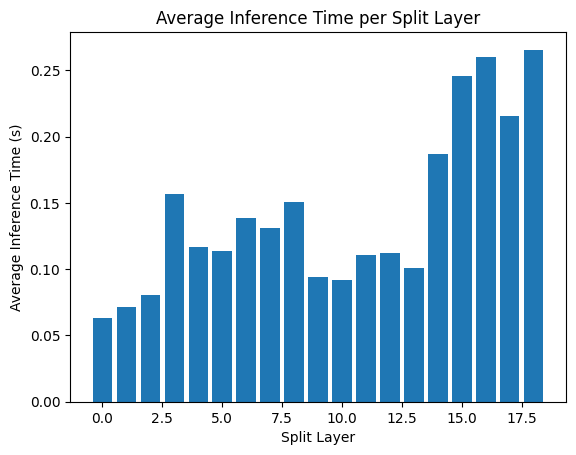

In [12]:
grouped_df["inference_time"] = grouped_df["inference_time_ns"] / 1e9

plt.bar(grouped_df['split_layer'], grouped_df['inference_time'])
plt.xlabel('Split Layer')
plt.ylabel('Average Inference Time (s)')
plt.title('Average Inference Time per Split Layer')
plt.show()